# Execute the code below
This is a dataset with car models, and continents where cars are producted.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/cars.csv"
df_cars = pd.read_csv(link)
df_cars = df_cars.loc[df_cars['continent'].isin([' US.', ' Europe.'])]
df_cars.reset_index(drop = True, inplace = True)
df_cars

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,continent
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
205,23.5,6,173,110,2725,13,1982,US.
206,17.0,8,305,130,3840,15,1980,US.
207,22.0,6,232,112,2835,15,1983,US.
208,18.0,6,232,100,3288,16,1972,US.


# Pairplot and heatmap
- Draw a pairplot with different color by continent
- Draw a correlation heatmap

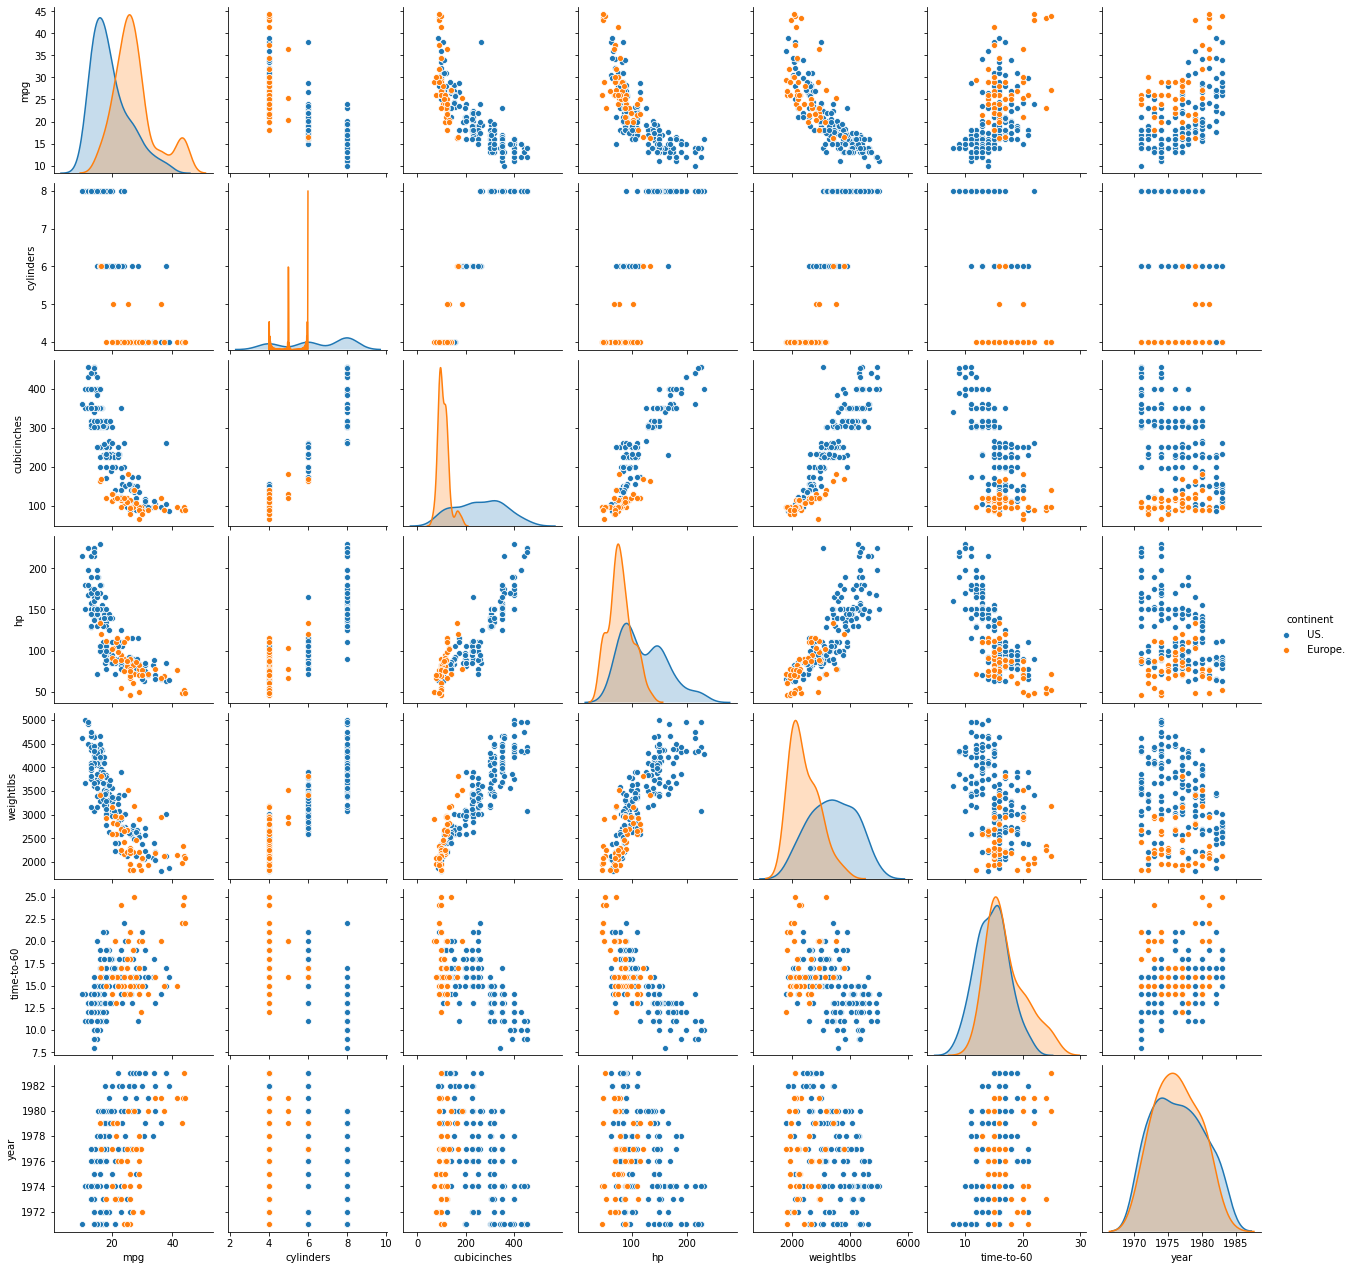

In [2]:
# Your code here :

## Pairplot
_ = sns.pairplot(df_cars, hue = 'continent')
plt.show()

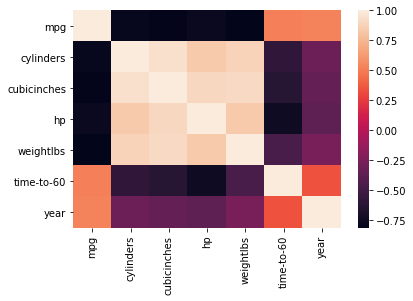

In [3]:
## Correlation heatmap
_= sns.heatmap(df_cars.corr())

# Decision Tree
Let's select the numeric columns as variables and the category Continent as target

In [0]:
# Your code here :
X = df_cars[['mpg',	'cylinders',	'cubicinches',	'hp',	'weightlbs',	'time-to-60',	'year']]
y = df_cars['continent']

## Split the dataset and train the model

First, you have to train-test split the dataset.

Then, you'll train your model on the train set with the DecisionTreeClassifier from scikit-learn. 

In [5]:
# Your code here :
## Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

## Training
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier().fit(X_train, y_train)

The length of the initial dataset is : 210
The length of the train dataset is   : 157
The length of the test dataset is    : 53


## Score and Confusion matrix
- What is the accuracy score and confusion matrix of our model on the **train** set ?
- What is the accuracy score and confusion matrix of our model on the **test** set ?

Maybe our model is overfitted...

In [6]:
# Your code here :
from sklearn.metrics import accuracy_score, confusion_matrix

# train data
print('TRAIN SET SCORES')
predictions = DTmodel.predict(X_train)
accuracy = accuracy_score(y_train, predictions) 
conf_mtrx = confusion_matrix(y_train, predictions)
precision = conf_mtrx[0, 0] / conf_mtrx[:, 0].sum()  
recall = conf_mtrx[0, 0] / conf_mtrx[0, :].sum() 

print("Accuracy =", accuracy)
print("Precision =", precision)
print("Recall =", recall)
print("Confusion matrix:\n", conf_mtrx, "\n")

# test data
print('TEST SET SCORES')
predictions = DTmodel.predict(X_test)
accuracy = accuracy_score(y_test, predictions) 
conf_mtrx = confusion_matrix(y_test, predictions)
precision = conf_mtrx[0, 0] / conf_mtrx[:, 0].sum()  
recall = conf_mtrx[0, 0] / conf_mtrx[0, :].sum() 

print("Accuracy =", accuracy)
print("Precision =", precision)
print("Recall =", recall)
print("Confusion matrix:\n", conf_mtrx, "\n")


TRAIN SET SCORES
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
Confusion matrix:
 [[ 33   0]
 [  0 124]] 

TEST SET SCORES
Accuracy = 0.8867924528301887
Precision = 0.8461538461538461
Recall = 0.7333333333333333
Confusion matrix:
 [[11  4]
 [ 2 36]] 



## Display the Decision Tree 

In [7]:
# Just change the name with your model name to see the decision tree
from sklearn.tree import export_graphviz
import pydotplus

DT_data = export_graphviz( DTmodel )  # Change with your model here
print(DT_data)

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 133.0\ngini = 0.332\nsamples = 157\nvalue = [33, 124]"] ;
1 [label="X[6] <= 1981.5\ngini = 0.462\nsamples = 47\nvalue = [30, 17]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[4] <= 2238.0\ngini = 0.375\nsamples = 40\nvalue = [30, 10]"] ;
1 -> 2 ;
3 [label="X[2] <= 97.5\ngini = 0.483\nsamples = 22\nvalue = [13, 9]"] ;
2 -> 3 ;
4 [label="X[4] <= 2099.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 8\nvalue = [8, 0]"] ;
4 -> 5 ;
6 [label="X[4] <= 2157.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
4 -> 6 ;
7 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
6 -> 8 ;
9 [label="X[0] <= 29.75\ngini = 0.444\nsamples = 12\nvalue = [4, 8]"] ;
3 -> 9 ;
10 [label="X[6] <= 1973.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
10 -> 11 ;
12 [label=

### It's not very readable...
Let's try with this

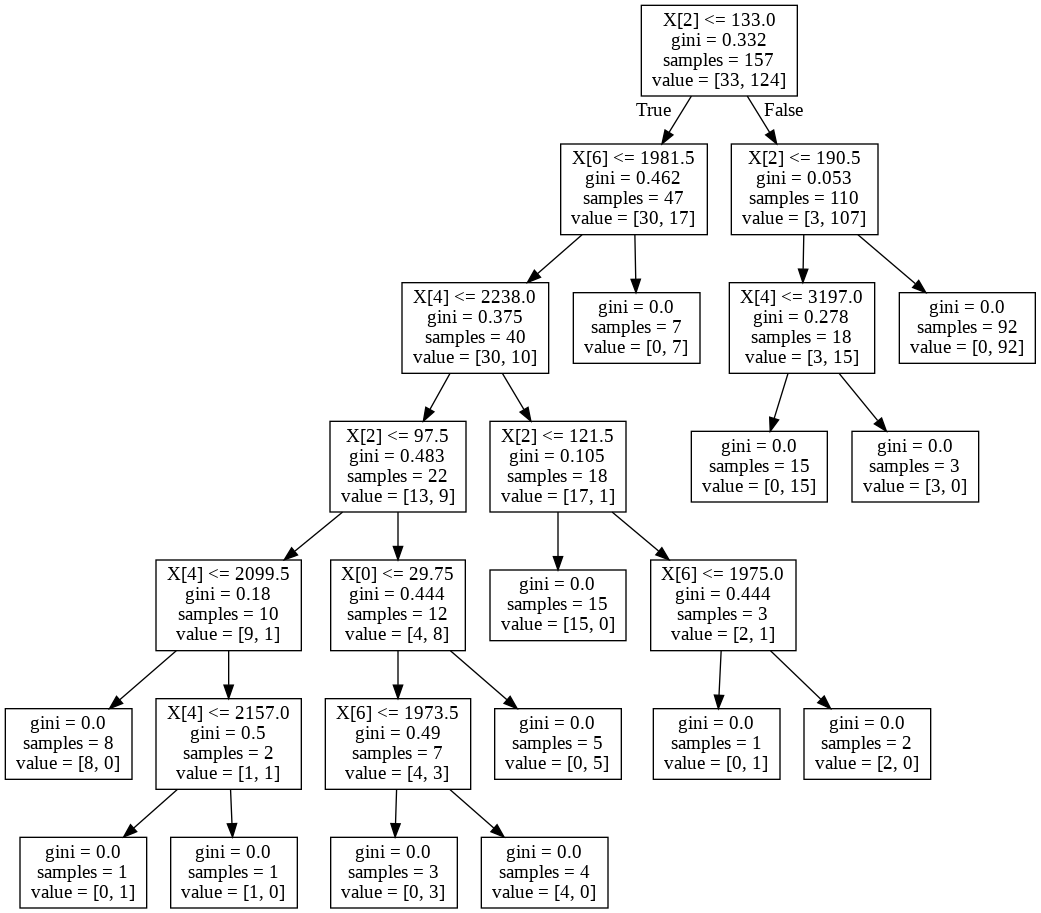

In [8]:
# Execute the code below :
from IPython.display import display, Image

graph = pydotplus.graph_from_dot_data(DT_data)
graph.write_png('tree.png')
display(Image(filename='tree.png'))

### It's better, but we can do better and better !
Try to play with the arguments of the export_graphviz function to be more readable. Especially : filled, rounded, class_names and feature_names.

Your goal is to get a readable decision tree with :
- US cars in one color and European cars in another
- readable class names and feature names

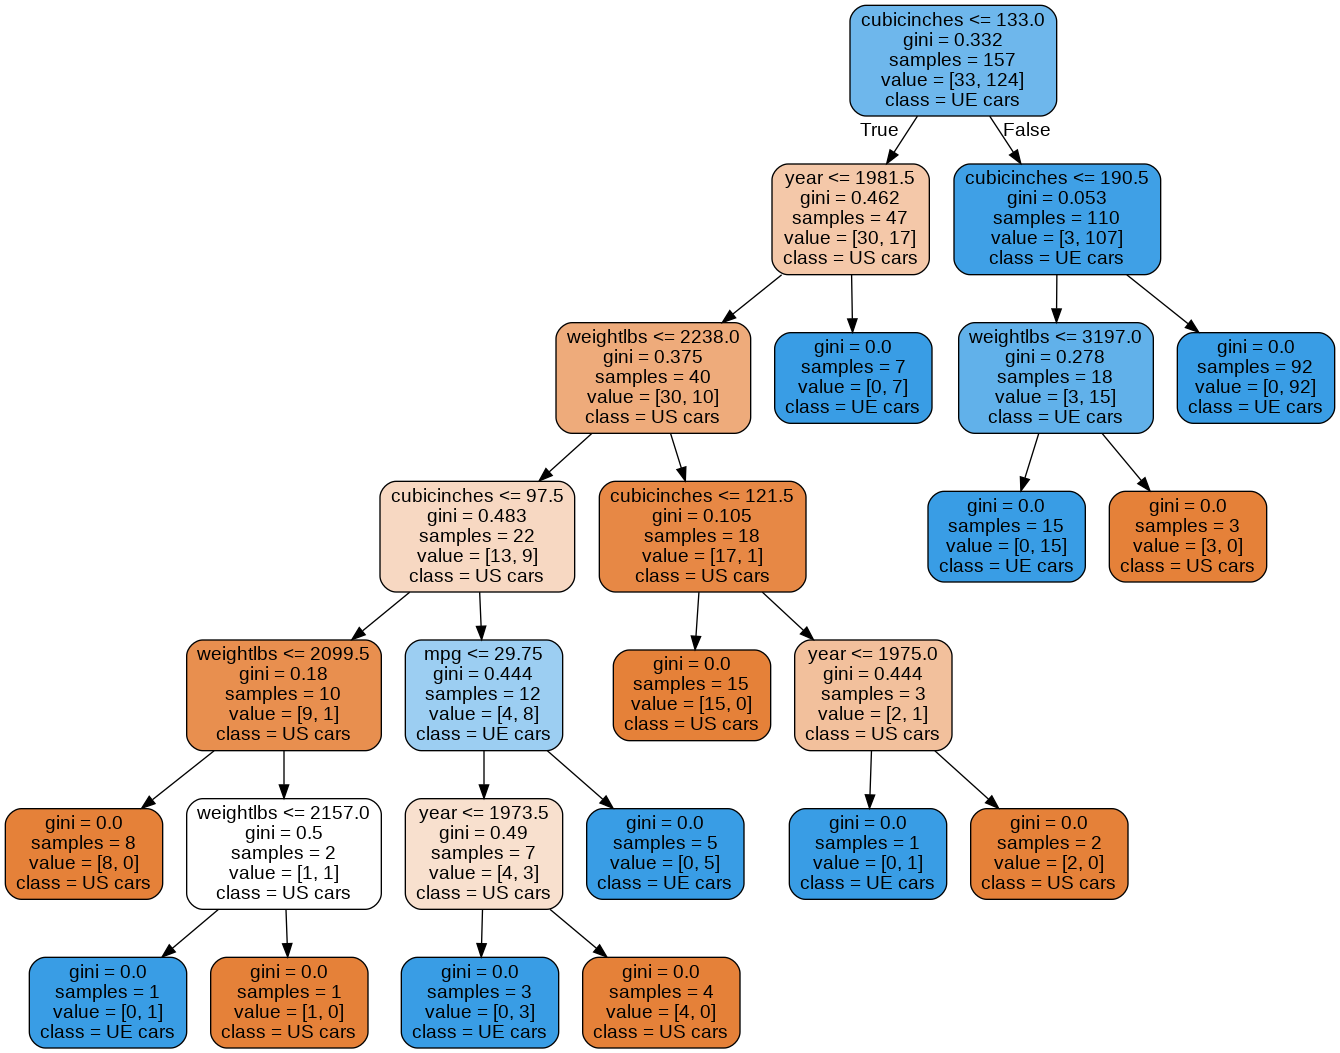

In [9]:
# Your code here :
DT_data2 = export_graphviz(DTmodel, filled = True, rounded = True, class_names = ['US cars', 'UE cars'], feature_names = ['mpg',	'cylinders',	'cubicinches',	'hp',	'weightlbs',	'time-to-60',	'year'])

graph = pydotplus.graph_from_dot_data(DT_data2)
graph.write_png('tree.png')
display(Image(filename='tree.png'))

## Overfitting
Try to reduce overfitting (ie increase the test accuracy score and probably decrease the train accuracy score).

You can try to change the max_depth argument in the Decision Tree classifier.

Print your best test score, the confusion matrix and the decision tree.

In [10]:
# Your code here :
for i in range(1, 11):
  DTmodel = DecisionTreeClassifier(max_depth = i).fit(X_train, y_train)
  predictions = DTmodel.predict(X_test)
  accuracy = accuracy_score(y_test, predictions) 
  conf_mtrx = confusion_matrix(y_test, predictions)
  precision = conf_mtrx[0, 0] / conf_mtrx[:, 0].sum()  
  recall = conf_mtrx[0, 0] / conf_mtrx[0, :].sum() 
  print("With max_depth =", i)
  print("Accuracy =", accuracy)
  print("Precision =", precision)
  print("Recall =", recall)
  print("Confusion matrix:\n", conf_mtrx, "\n")

With max_depth = 1
Accuracy = 0.8867924528301887
Precision = 0.7368421052631579
Recall = 0.9333333333333333
Confusion matrix:
 [[14  1]
 [ 5 33]] 

With max_depth = 2
Accuracy = 0.9056603773584906
Precision = 0.8125
Recall = 0.8666666666666667
Confusion matrix:
 [[13  2]
 [ 3 35]] 

With max_depth = 3
Accuracy = 0.9056603773584906
Precision = 0.8125
Recall = 0.8666666666666667
Confusion matrix:
 [[13  2]
 [ 3 35]] 

With max_depth = 4
Accuracy = 0.9056603773584906
Precision = 0.8571428571428571
Recall = 0.8
Confusion matrix:
 [[12  3]
 [ 2 36]] 

With max_depth = 5
Accuracy = 0.9056603773584906
Precision = 0.8571428571428571
Recall = 0.8
Confusion matrix:
 [[12  3]
 [ 2 36]] 

With max_depth = 6
Accuracy = 0.8679245283018868
Precision = 0.8333333333333334
Recall = 0.6666666666666666
Confusion matrix:
 [[10  5]
 [ 2 36]] 

With max_depth = 7
Accuracy = 0.8679245283018868
Precision = 0.8333333333333334
Recall = 0.6666666666666666
Confusion matrix:
 [[10  5]
 [ 2 36]] 

With max_depth = 8

Best score for **max_depht = 2**
--

Accuracy = 0.9056603773584906
Precision = 0.8125
Recall = 0.8666666666666667
Confusion matrix:
 [[13  2]
 [ 3 35]] 



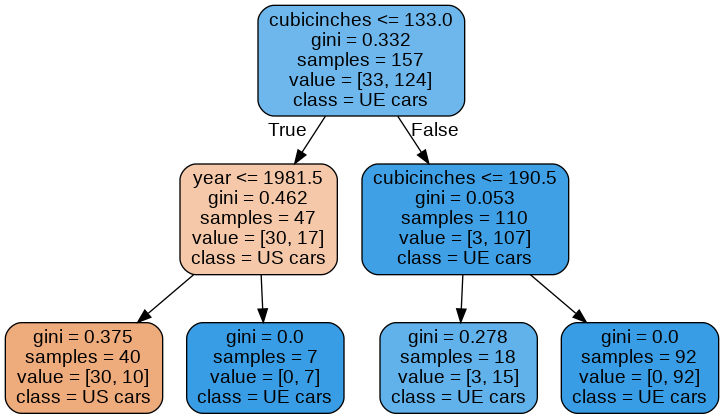

In [11]:
DTmodel = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
predictions = DTmodel.predict(X_test)
accuracy = accuracy_score(y_test, predictions) 
conf_mtrx = confusion_matrix(y_test, predictions)
precision = conf_mtrx[0, 0] / conf_mtrx[:, 0].sum()  
recall = conf_mtrx[0, 0] / conf_mtrx[0, :].sum() 

print("Accuracy =", accuracy)
print("Precision =", precision)
print("Recall =", recall)
print("Confusion matrix:\n", conf_mtrx, "\n")

DT_data3 = export_graphviz(DTmodel, filled = True, rounded = True, class_names = ['US cars', 'UE cars'], feature_names = ['mpg',	'cylinders',	'cubicinches',	'hp',	'weightlbs',	'time-to-60',	'year'])

graph = pydotplus.graph_from_dot_data(DT_data3)
graph.write_png('tree.png')
display(Image(filename='tree.png'))